In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.datasets import mnist

import tensorflow.keras.backend as K

In [2]:
#first we will load dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def load_and_resize_images_from_folder(folder, target_size=(28, 28)):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                if img_path.endswith(".jpg") or img_path.endswith(".png"):
                    # Load image in grayscale
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        # Resize the image
                        img_resized = cv2.resize(img, target_size)
                        images.append(img_resized)
                        labels.append(subfolder)  # Use subfolder name as label
    return images, labels

# Assuming you have a folder with subfolders containing images
folder_path = "/content/drive/MyDrive/kanji"
images, labels = load_and_resize_images_from_folder(folder_path)

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Splitting the data into training and testing sets
# Adjust the test_size according to your preference
x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.3, random_state=42)

# Convert the lists to NumPy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
num_classes = len(np.unique(labels_encoded))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Now you have x_train, x_test, y_train, and y_test ready to be used for training your AI model


In [24]:
print(labels_encoded)
print(labels)

[0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 1]
['fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'tree', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'river', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'sky', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain', 'mountain']


In [6]:
# (x_train,y_train),(x_test,y_test) = mnist.load_data()

In [25]:
#Now we will se our dataset

print("Dimension of x_train",x_train.shape)
print("Dimension of x_test",x_test.shape)
print("Dimension of y_test",y_test.shape)

Dimension of x_train (35, 28, 28)
Dimension of x_test (15, 28, 28)
Dimension of y_test (15, 5)


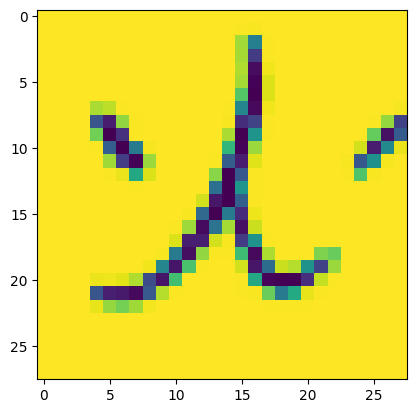

[1. 0. 0. 0. 0.]


In [26]:
#we will see a single image in out dataset
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_train[5])
plt.show()
print(y_train[5])

In [9]:
#Now defining some parameters for our model

In [27]:
num_classes = 5
epochs = 30
img_rows = 28
img_cols = 28

In [28]:
#build our model
#BY DEFAULT STRIDE IS 1
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))

In [12]:
#compile our model

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_5 (Bat  (None, 11, 11, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 batch_normalization_6 (Bat  (None, 6, 6, 32)         

In [41]:
#fit the model
his = model.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
2/2 [==============================] - 0s 199ms/step - loss: 0.1366 - accuracy: 0.9714 - val_loss: 1.6826 - val_accuracy: 0.2667
Epoch 2/50
2/2 [==============================] - 0s 92ms/step - loss: 0.1294 - accuracy: 1.0000 - val_loss: 1.6849 - val_accuracy: 0.2667
Epoch 3/50
2/2 [==============================] - 0s 54ms/step - loss: 0.2330 - accuracy: 0.9429 - val_loss: 1.6818 - val_accuracy: 0.2667
Epoch 4/50
2/2 [==============================] - 0s 63ms/step - loss: 0.2275 - accuracy: 0.9429 - val_loss: 1.6319 - val_accuracy: 0.2667
Epoch 5/50
2/2 [==============================] - 0s 53ms/step - loss: 0.1529 - accuracy: 0.9429 - val_loss: 1.5281 - val_accuracy: 0.4667
Epoch 6/50
2/2 [==============================] - 0s 67ms/step - loss: 0.0899 - accuracy: 1.0000 - val_loss: 1.4302 - val_accuracy: 0.5333
Epoch 7/50
2/2 [==============================] - 0s 52ms/step - loss: 0.2448 - accuracy: 0.8857 - val_loss: 1.4271 - val_accuracy: 0.5333
Epoch 8/50
2/2 [==========

In [63]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have already trained your model and obtained predictions
y_pred = model.predict(x_test)
pred_y = np.argmax(y_pred, axis=1)
true_y = np.argmax(y_test, axis=1)

# Printing classification report
print(classification_report(true_y, pred_y))

1/1 [==============================] - 0s 73ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.50      0.40         2
           2       1.00      0.50      0.67         2
           3       0.44      1.00      0.62         4
           4       1.00      0.50      0.67         4

    accuracy                           0.53        15
   macro avg       0.56      0.50      0.47        15
weighted avg       0.56      0.53      0.48        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
!pip install scikit-plot

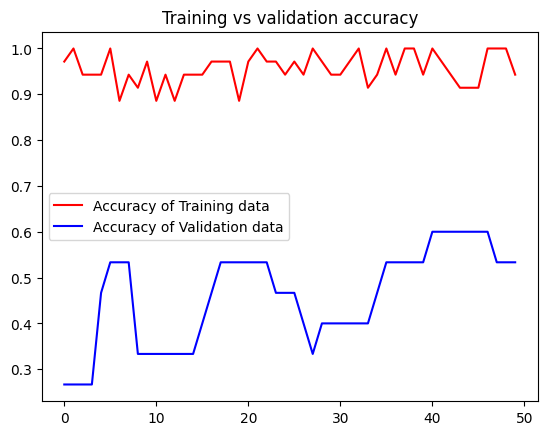

<Figure size 640x480 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

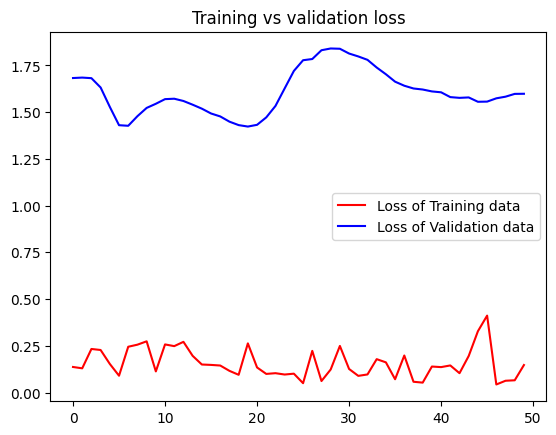

<Figure size 640x480 with 0 Axes>

In [46]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

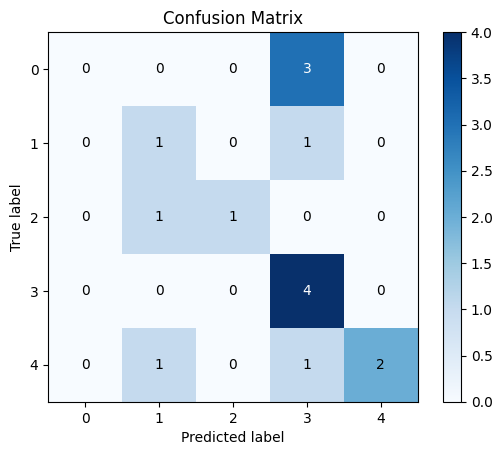

In [44]:
import scikitplot as skplot
from mlxtend.plotting import plot_confusion_matrix

skplot.metrics.plot_confusion_matrix(true_y,pred_y,normalize=False)
plt.show()

1/1 [==============================] - 0s 35ms/step


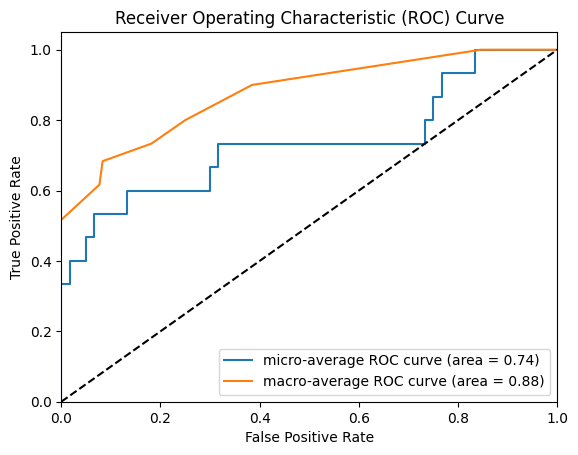

In [64]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming model.predict() returns probabilities for each class
y_pred_proba = model.predict(x_test)

# Get the class with the highest probability as the predicted class
pred_y = np.argmax(y_pred_proba, axis=1)

# Ensure pred_y has the correct shape
pred_y = np.expand_dims(pred_y, axis=1)  # Add an additional axis

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_pred_proba.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro))

# Compute macro-average ROC curve and ROC area
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):  # Assuming 5 classes
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):  # Assuming 5 classes
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 5  # Number of classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot macro-average ROC curve
plt.plot(fpr_macro, tpr_macro, label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc_macro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--')

# Set plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [65]:
# #save our model

# model_json = model.to_json()
# with open("model.json","w") as json_file:
#     json_file.write(model_json)
# model.save_weights("models.h5")

In [66]:
# import tensorflowjs as tfjs
# tfjs.converters.save_keras_model(model,'/home/ubuntu/love/keras')